In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
df =  pd.read_csv("events.csv", low_memory=False)

# Casos particulares de clientes de Trocafone

# Clientes con mayor compras

In [3]:
personas = df.loc[df['event'] == 'conversion','person']
personas.value_counts().head(7)


252adec6    15
4200bdee    12
a0d4baef    11
ba325a6b    10
f646efa2     8
d12fbe38     8
a96e304b     8
Name: person, dtype: int64

# Clientes que compraron varias veces el mismo celular 

In [4]:
personas = df.loc[df['event'] == 'conversion',['person','event','sku','model','condition','storage','color']]
personas['descripcionCompleta'] = personas['model']+" "+personas['condition']+" "+personas['storage']+" "+personas['color']

personas = personas.groupby('person').agg({'descripcionCompleta':['count','min']})
personas.columns = ['Compras del mismo producto',"Nombre del producto"]
personas.sort_values(by='Compras del mismo producto', ascending = False).reset_index().head(7)


,person,Compras del mismo producto,Nombre del producto
0,252adec6,15,Motorola Moto G2 3G Dual Muito Bom 16GB Preto
1,4200bdee,12,Samsung Galaxy A5 Bom 16GB Branco
2,a0d4baef,11,Samsung Galaxy J1 Mini Muito Bom 8GB Preto
3,ba325a6b,10,Samsung Galaxy S6 Flat Bom 32GB Dourado
4,f646efa2,8,Samsung Galaxy J5 Bom 16GB Dourado
5,d12fbe38,8,Samsung Galaxy Note 4 Muito Bom 32GB Branco
6,a96e304b,8,iPhone 5c Bom 8GB Amarelo


### Estas personas de forma extraña, en 5 meses compraron exactamente el mismo celular

#### _La particularidad que trae esto es que los clientes que mas compraron celulares en Trocafone, compraron el mismo celular. Lo que nos puede llevar a pensar que son para uso empresarial_

# Modelos preferidos por los usuarios

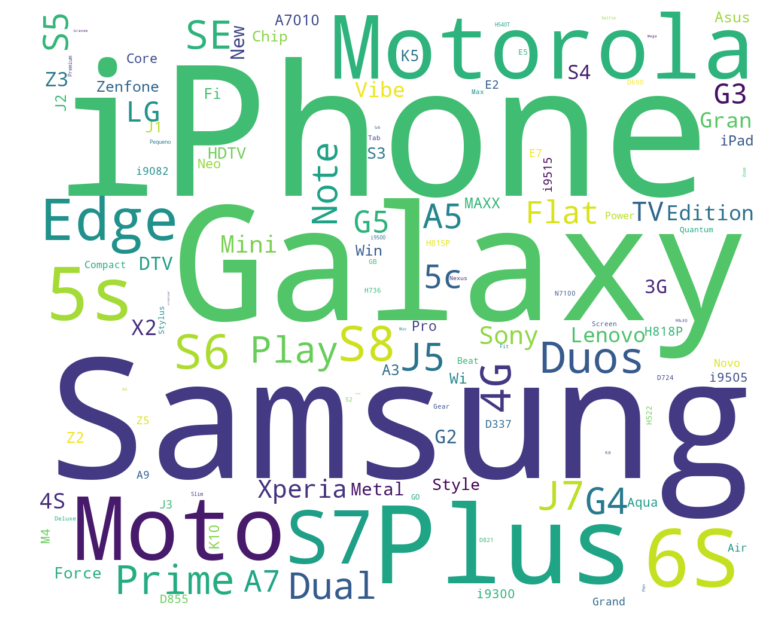

In [43]:
viewedModels = df.loc[df['event'] =='viewed product','model']
viewedModels = viewedModels.to_frame()
wc= WordCloud(background_color="white",collocations=False, width=1200, height=1000,max_words=2000)
wordcloud = wc.generate(' '.join(viewedModels['model']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
